In [169]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [170]:
import numpy as np

data_path = '/content/drive/MyDrive/Colab Notebooks/subdata.npy'

d = np.load(data_path)

In [171]:
import plotly
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from mpl_toolkits import mplot3d

L = 10
N = 64
xx = np.linspace(-L,L,N+1)
x = xx[0:N]
y = x
z = x

K = (2*np.pi/(2*L))*np.linspace(-N/2, N/2-1, N)
xv, yv, zv = np.meshgrid(x,y,z)
kx, ky, kz = np.meshgrid(K,K,K)

fft = np.zeros((N,N,N))
for i in range(0,49):
  signal = np.reshape(d[:,i],(N,N,N))
  fft = fft + np.fft.fftshift(np.fft.fftn(signal))

avg_fft = np.abs(np.real(fft/49))
max_i = np.where(avg_fft == np.amax(avg_fft))
print(max_i)

(array([26, 38]), array([17, 47]), array([55,  9]))


In [172]:
def g_filter1(x,y,z,s):
  # swap x and y as a consequence of np.where
  val = np.exp(-(((x-K[max_i[1][0]])**2+(y-K[max_i[0][0]])**2+(z-K[max_i[2][0]])**2)/(2*s**2)))
  return val

In [173]:
def g_filter2(x,y,z,s):
  # swap x and y as a consequence of np.where
  val = np.exp(-(((x-K[max_i[1][1]])**2+(y-K[max_i[0][1]])**2+(z-K[max_i[2][1]])**2)/(2*s**2)))
  return val

In [174]:
sigma = 2
g_vals1 = g_filter1(kx,ky,kz,sigma)

In [175]:
sigma = 2
g_vals2 = g_filter2(kx,ky,kz,sigma)

Text(0, 0.5, 'ky')

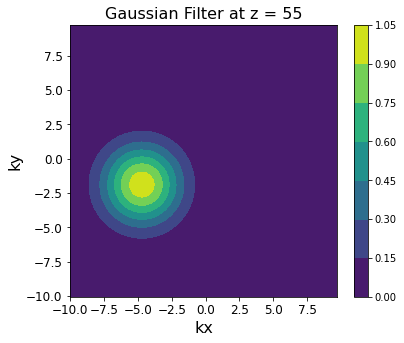

In [176]:
fig, ax1 = plt.subplots(figsize=(6,5))
im1 = ax1.contourf(kx[:,:,55], ky[:,:,55], (g_vals1[:,:,55]))
fig.colorbar(im1, ax=ax1)
ax1.set_title('Gaussian Filter at z = 55',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax1.set_xlabel('kx',fontsize=16)
ax1.set_ylabel('ky',fontsize=16)

Text(0, 0.5, 'ky')

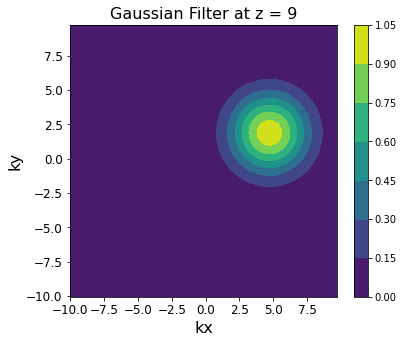

In [177]:
fig, ax1 = plt.subplots(figsize=(6,5))
im1 = ax1.contourf(kx[:,:,9], ky[:,:,9], (g_vals2[:,:,9]))
fig.colorbar(im1, ax=ax1)
ax1.set_title('Gaussian Filter at z = 9',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax1.set_xlabel('kx',fontsize=16)
ax1.set_ylabel('ky',fontsize=16)

Text(0, 0.5, 'ky')

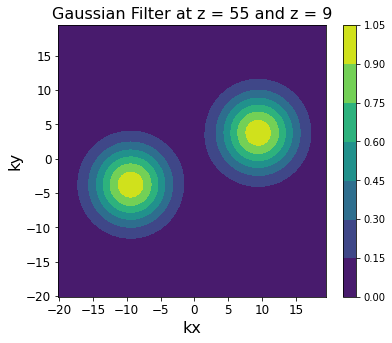

In [178]:
fig, ax1 = plt.subplots(figsize=(6,5))
im1 = ax1.contourf((kx[:,:,55]+kx[:,:,9]), (ky[:,:,55]+ky[:,:,9]), (g_vals1[:,:,55]+g_vals2[:,:,9]))
fig.colorbar(im1, ax=ax1)
ax1.set_title('Gaussian Filter at z = 55 and z = 9',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax1.set_xlabel('kx',fontsize=16)
ax1.set_ylabel('ky',fontsize=16)

Text(0, 0.5, 'ky')

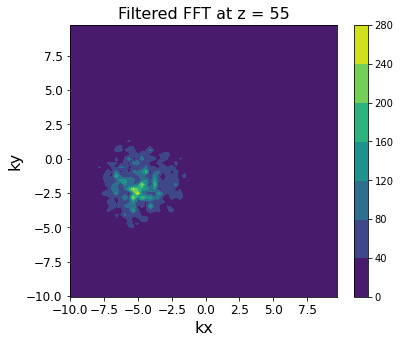

In [179]:
loc = np.zeros((49,3))
for i in range(0,49):
  signal = np.reshape(d[:,i],(N,N,N))
  fft = np.fft.fftshift(np.fft.fftn(signal))
  fft_filtered = fft*(g_vals1+g_vals2)
  denoised = np.real(np.fft.ifftn(np.fft.ifftshift(fft_filtered)))
  denoised_normalized = np.abs(denoised)/np.abs(denoised).max()
  max_i = np.where(denoised_normalized == np.amax(denoised_normalized))
  loc[i,:] = max_i

fig, ax2 = plt.subplots(figsize=(6,5))
im2 = ax2.contourf(kx[:,:,1], ky[:,:,1], abs(fft_filtered[:,:,55]))
fig.colorbar(im2, ax=ax2)
ax2.set_title('Filtered FFT at z = 55',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax2.set_xlabel('kx',fontsize=16)
ax2.set_ylabel('ky',fontsize=16)

Text(0, 0.5, 'ky')

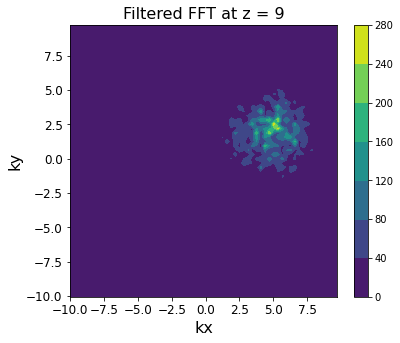

In [180]:
fig, ax2 = plt.subplots(figsize=(6,5))
im2 = ax2.contourf(kx[:,:,1], ky[:,:,1], abs(fft_filtered[:,:,9]))
fig.colorbar(im2, ax=ax2)
ax2.set_title('Filtered FFT at z = 9',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax2.set_xlabel('kx',fontsize=16)
ax2.set_ylabel('ky',fontsize=16)

Text(0, 0.5, 'ky')

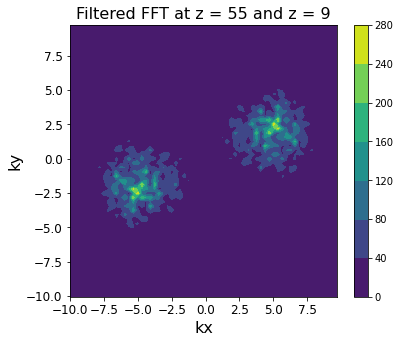

In [181]:
fig, ax2 = plt.subplots(figsize=(6,5))
im2 = ax2.contourf(kx[:,:,1], ky[:,:,1], abs(fft_filtered[:,:,55]+fft_filtered[:,:,9]))
fig.colorbar(im2, ax=ax2)
ax2.set_title('Filtered FFT at z = 55 and z = 9',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax2.set_xlabel('kx',fontsize=16)
ax2.set_ylabel('ky',fontsize=16)

Text(0.5, 0, 'z')

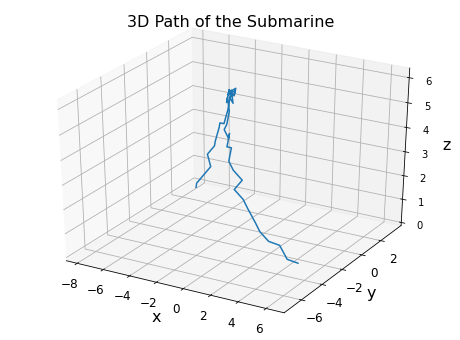

In [182]:
x_loc = (loc[:,0]-32)/64*(2*L)
y_loc = (loc[:,1]-32)/64*(2*L)
z_loc = (loc[:,2]-32)/64*(2*L)
fig = plt.figure(figsize=(8,6))
ax3 = plt.axes(projection="3d")
ax3.plot3D(x_loc, y_loc, z_loc)
ax3.set_title('3D Path of the Submarine',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax3.set_xlabel('x',fontsize=16)
ax3.set_ylabel('y',fontsize=16)
ax3.set_zlabel('z',fontsize=16)

In [183]:
print(x_loc[0],y_loc[0])
print(x_loc[48],y_loc[48])

-7.8125 3.125
6.25 -5.0


Text(6.25, -5.0, 'ending point')

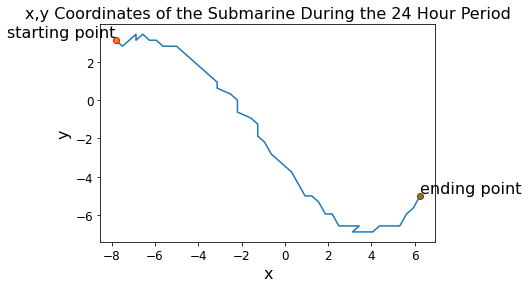

In [184]:

plt.plot(x_loc, y_loc)
plt.title('x,y Coordinates of the Submarine During the 24 Hour Period',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.plot(x_loc[0],y_loc[0],marker='o',mec='r')
plt.plot(x_loc[48],y_loc[48],marker='o',mec='r')
plt.text(x_loc[0],y_loc[0],'starting point',verticalalignment='bottom',horizontalalignment='right',fontsize=16)
plt.text(x_loc[48],y_loc[48],'ending point',verticalalignment='bottom',horizontalalignment='left',fontsize=16)